In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
titanic_data=pd.read_csv("titanic_train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.150,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.500,NaN,S


In [6]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic_data.shape

(891, 12)

In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_data=pd.DataFrame(data=titanic_data)


In [12]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
titanic_data['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [15]:
titanic_data['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
titanic_data['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [17]:
titanic_data['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
0.42       1
34.50      1
66.00      1
14.50      1
0.92       1
Name: Age, Length: 89, dtype: int64

In [18]:
titanic_data['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
titanic_data['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
titanic_data['Cabin'].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
D                3
              ... 
D9               1
B78              1
D56              1
C50              1
B101             1
Name: Cabin, Length: 148, dtype: int64

In [21]:
titanic_data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [22]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
np.mean(titanic_data['Survived']) * 100

38.38383838383838

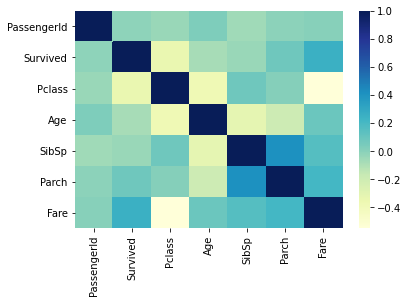

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

titanic_data.corr()

In [25]:
np.mean(titanic_data['Survived'][titanic_data['Sex']=="male"] ) * 100  

18.890814558058924

In [26]:
np.mean(titanic_data['Survived'][titanic_data['Sex'] == 'female']) * 100

74.20382165605095

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

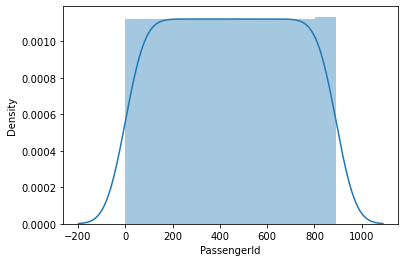

In [27]:
sns.distplot(titanic_data['PassengerId'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

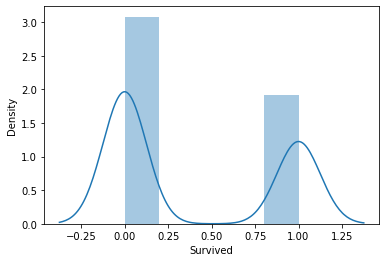

In [28]:
sns.distplot(titanic_data['Survived'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

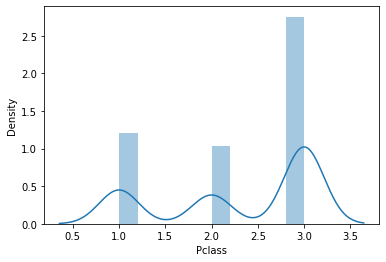

In [29]:
sns.distplot(titanic_data['Pclass'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

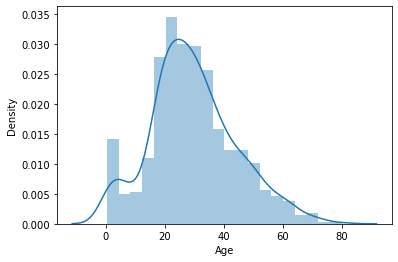

In [30]:
sns.distplot(titanic_data['Age'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

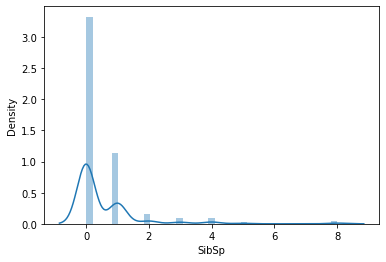

In [31]:
sns.distplot(titanic_data['SibSp'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

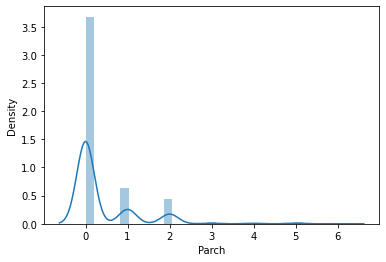

In [32]:
sns.distplot(titanic_data['Parch'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

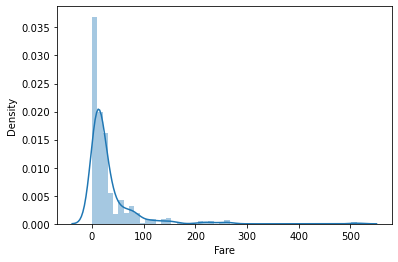

In [33]:
sns.distplot(titanic_data['Fare'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

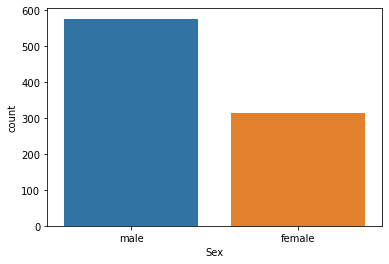

In [34]:
sns.countplot(titanic_data['Sex'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

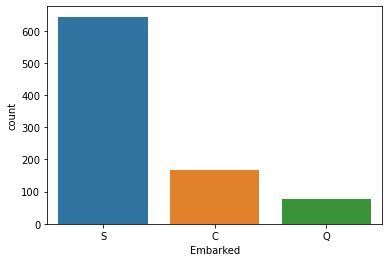

In [35]:
sns.countplot(titanic_data['Embarked'])

In [36]:
titanic_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
for f in titanic_data.columns:
    print(f,titanic_data[f].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [38]:
titanic_data=titanic_data.drop(columns=['PassengerId','Cabin','Ticket','Fare','Name'])

In [39]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [40]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [41]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [42]:
df=titanic_data.dropna()
df = df.reset_index(drop=True)

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,Q
708,0,2,male,27.0,0,0,S
709,1,1,female,19.0,0,0,S
710,1,1,male,26.0,0,0,C


In [44]:
non_nf=[f for f in df.columns if df[f].dtype=='O']
non_nf

['Sex', 'Embarked']

In [45]:
nf=[f for f in df.columns if df[f].dtype!='O']

In [46]:
nf

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

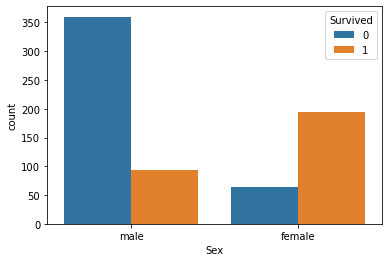

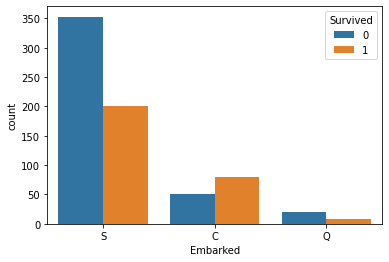

In [47]:
for f in non_nf:
    sns.countplot(x=f,data=df,hue='Survived')
    plt.show()

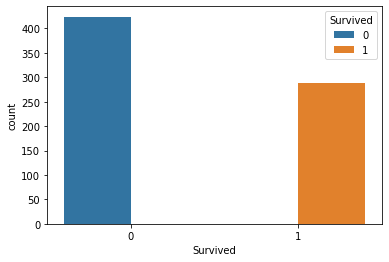

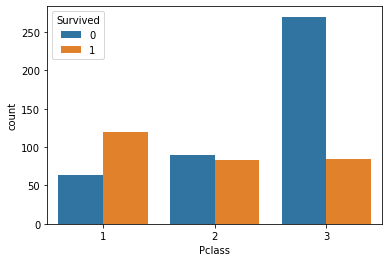

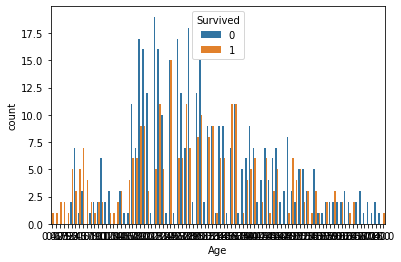

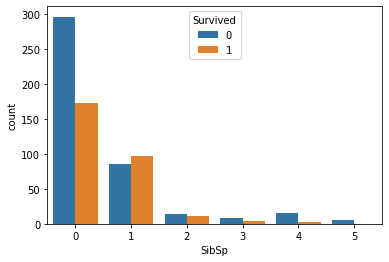

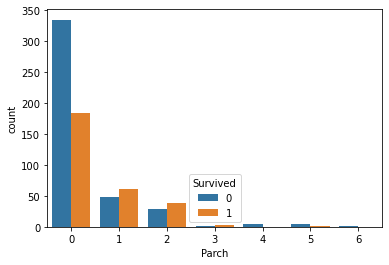

In [48]:
for f in nf:
    sns.countplot(x=f,data=df,hue='Survived')
    plt.show()

In [49]:
df.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,,,,,,
0,424,424,424,424,424,424
1,288,288,288,288,288,288


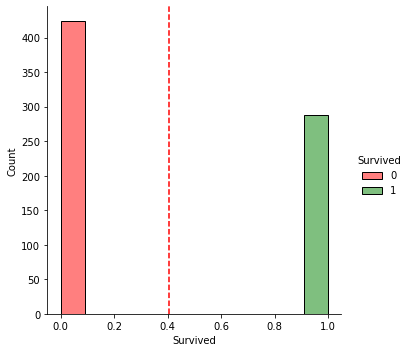

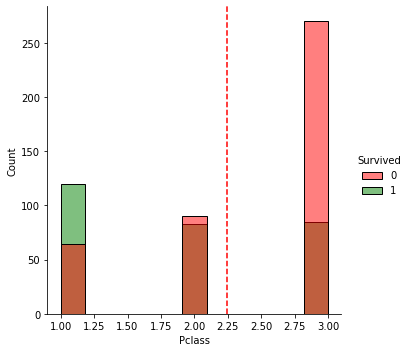

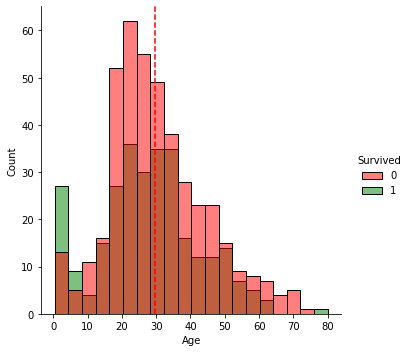

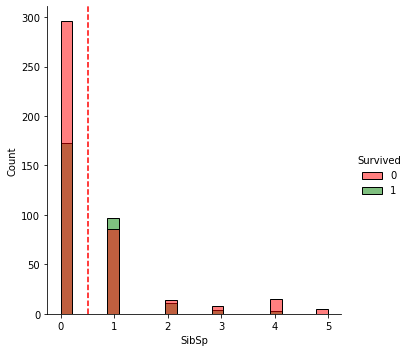

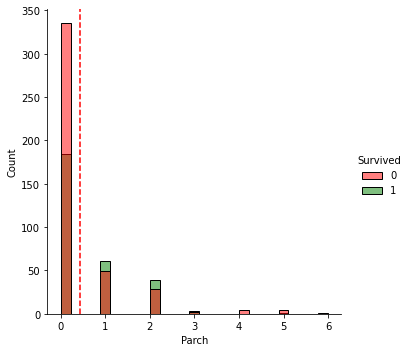

In [50]:
for f in nf:
    sns.displot(x=f,data=df,hue='Survived',palette=['r','g'])
    plt.axvline(df[f].mean(), linestyle = '--', color = "red")
    plt.show()

In [51]:
df.groupby('Survived')[['Age']].mean()

,Age
Survived,
0,30.626179
1,28.193299


In [52]:
df.groupby('Survived')[['Age']].median()

,Age
Survived,
0,28.0
1,28.0


<AxesSubplot:>

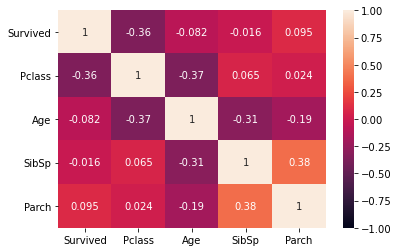

In [53]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [54]:
titanic_data.Age.isna().sum()

177

In [55]:
titanic_data["Age"]= titanic_data["Age"].fillna(titanic_data["Age"].mean())

In [56]:
titanic_data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
titanic_data.Age = titanic_data.Age.astype(int)

In [58]:
temp = titanic_data.copy()

In [59]:
temp['Age'] = pd.cut(temp['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

<AxesSubplot:xlabel='Age', ylabel='count'>

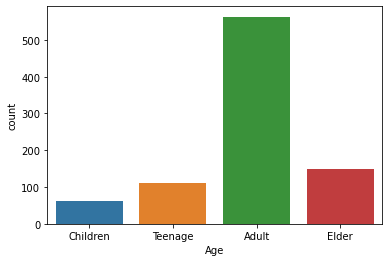

In [60]:
ax = sns.countplot(data=temp,x = 'Age')
ax

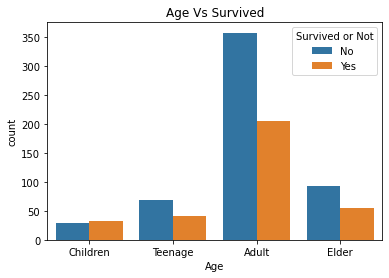

In [61]:
ax = sns.countplot(data=temp,x = 'Age',hue='Survived')


plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Age Vs Survived')
plt.show();

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

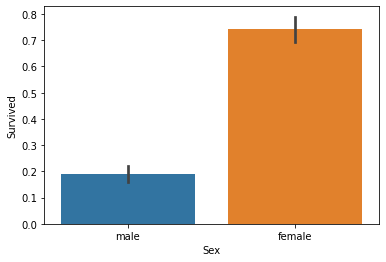

In [62]:
sns.barplot(x="Sex", y="Survived", data=titanic_data)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

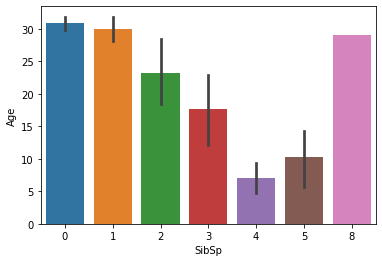

In [63]:
sns.barplot(x="SibSp", y="Age", data=titanic_data)

In [64]:
titanic_data['Age'].fillna(value=titanic_data['Age'].mean()-(0.2*titanic_data['SibSp']), inplace=True)

In [65]:
titanic_data[['Age','SibSp']].corr()

,Age,SibSp
Age,1.000000,-0.232743
SibSp,-0.232743,1.000000


In [66]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [67]:
titanic_data['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [68]:
titanic_data['Sex'] = titanic_data['Sex'].map(lambda x: 1 if x == 'male' else 0)
titanic_data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [69]:
for i in range (len(titanic_data.columns)):
  col = titanic_data.columns[i]
  print("Unique values for column " + col)
  print(titanic_data[col].value_counts())

Unique values for column Survived
0    549
1    342
Name: Survived, dtype: int64
Unique values for column Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Unique values for column Sex
1    577
0    314
Name: Sex, dtype: int64
Unique values for column Age
29    197
24     31
30     27
28     27
22     27
     ... 
74      1
53      1
66      1
12      1
80      1
Name: Age, Length: 71, dtype: int64
Unique values for column SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Unique values for column Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
Unique values for column Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [70]:
temp.Pclass.unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

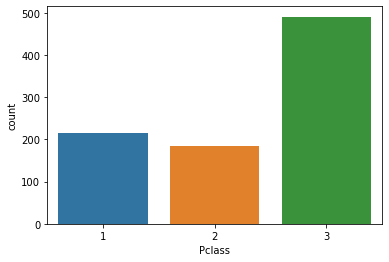

In [71]:
ax = sns.countplot(data=temp,x='Pclass');
ax

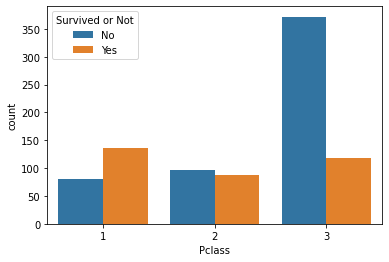

In [72]:
ax = sns.countplot(data=temp,x='Pclass',hue='Survived');

plt.legend(title='Survived or Not', loc='upper left', labels=['No', 'Yes']);

In [73]:
temp.Sex.unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

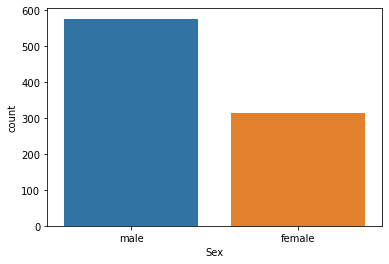

In [74]:
ax = sns.countplot(data=temp,x='Sex');
ax

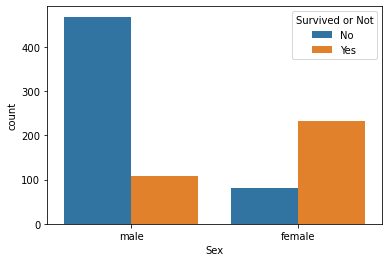

In [75]:
ax = sns.countplot(data=temp,x='Sex',hue='Survived');

plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);

In [76]:
temp.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

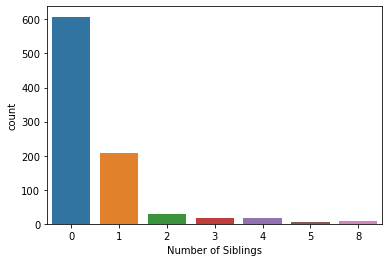

In [77]:
ax = sns.countplot(data=temp,x='SibSp');

ax.set_xlabel('Number of Siblings');

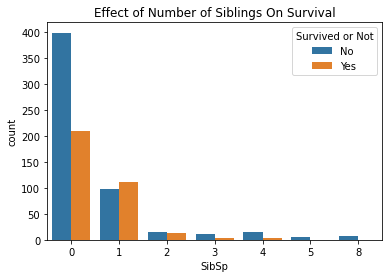

In [78]:
ax = sns.countplot(data=temp,x='SibSp',hue='Survived');

plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Effect of Number of Siblings On Survival')
plt.show();

In [79]:
temp.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

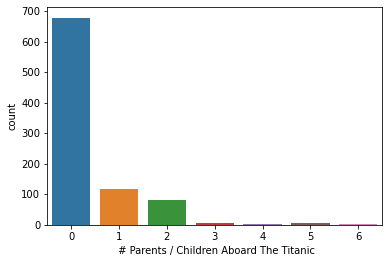

In [80]:
ax = sns.countplot(data=temp,x='Parch');

ax.set_xlabel(' # Parents / Children Aboard The Titanic');

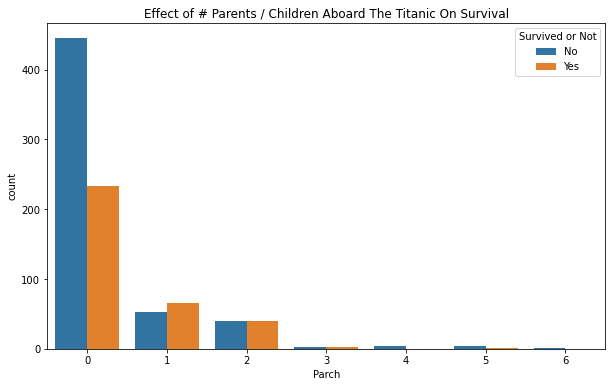

In [81]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Parch',hue='Survived');

plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Effect of # Parents / Children Aboard The Titanic On Survival')
plt.show();

In [82]:
temp['Family Size'] = temp['SibSp']+temp['Parch'] + 1

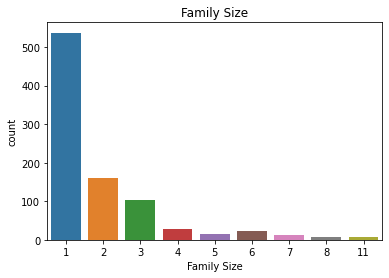

In [83]:
ax = sns.countplot(data=temp, x='Family Size')

ax.set_title('Family Size');

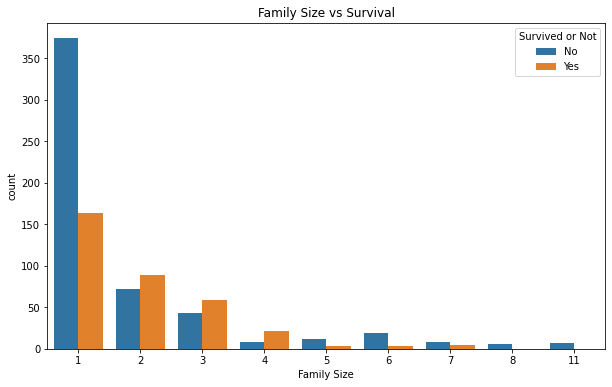

In [84]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Family Size',hue='Survived');

plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Family Size vs Survival')
plt.show();

In [85]:
temp.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

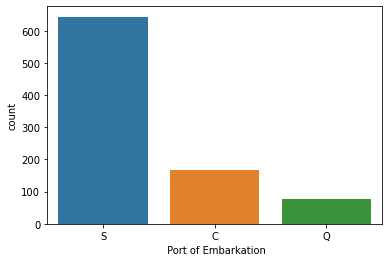

In [86]:
ax = sns.countplot(data=temp,x='Embarked');

ax.set_xlabel(' Port of Embarkation');

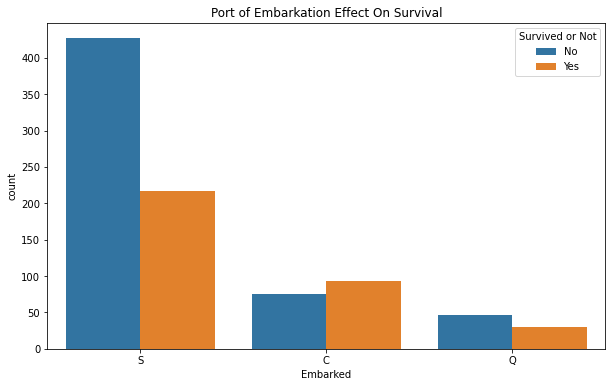

In [87]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Embarked',hue='Survived');

plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Port of Embarkation Effect On Survival')
plt.show();

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [89]:
l=LabelEncoder()
for f in non_nf:
    df[f]=l.fit_transform(df[f])

In [90]:
m=MinMaxScaler()
for f in non_nf:
    f_scaled=m.fit_transform(df[f].values.reshape(-1,1))
    df[f]=pd.DataFrame(f_scaled.reshape(-1,1))

In [91]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1.0,22.0,1,0,1.0
1,1,1,0.0,38.0,1,0,0.0
2,1,3,0.0,26.0,0,0,1.0
3,1,1,0.0,35.0,1,0,1.0
4,0,3,1.0,35.0,0,0,1.0
...,...,...,...,...,...,...,...
707,0,3,0.0,39.0,0,5,0.5
708,0,2,1.0,27.0,0,0,1.0
709,1,1,0.0,19.0,0,0,1.0
710,1,1,1.0,26.0,0,0,0.0


In [94]:
sdf=df['Survived']
df=df.drop(columns=['Survived'])
df

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1.0,22.0,1,0,1.0
1,1,0.0,38.0,1,0,0.0
2,3,0.0,26.0,0,0,1.0
3,1,0.0,35.0,1,0,1.0
4,3,1.0,35.0,0,0,1.0
...,...,...,...,...,...,...
707,3,0.0,39.0,0,5,0.5
708,2,1.0,27.0,0,0,1.0
709,1,0.0,19.0,0,0,1.0
710,1,1.0,26.0,0,0,0.0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(df, sdf, test_size = 0.1, random_state = 42)

In [96]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
494,2,1.0,57.0,0,0,0.5
408,3,1.0,24.0,0,0,1.0
346,1,1.0,50.0,1,0,1.0
265,1,1.0,45.5,0,0,1.0
78,1,1.0,21.0,0,1,1.0
...,...,...,...,...,...,...
71,3,1.0,26.0,1,2,1.0
106,2,1.0,23.0,0,0,0.0
270,3,1.0,45.0,0,0,1.0
435,2,1.0,8.0,1,1,1.0


In [97]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
506,1,0.0,24.0,0,0,0.0
394,1,0.0,54.0,1,0,0.0
210,1,1.0,52.0,1,1,1.0
247,1,0.0,18.0,2,2,0.0
437,2,1.0,27.0,0,0,1.0
...,...,...,...,...,...,...
136,3,1.0,4.0,4,1,0.5
420,2,0.0,2.0,1,1,1.0
336,3,1.0,21.0,0,0,0.5
381,3,0.0,2.0,0,1,1.0


In [98]:
y_train

494    0
408    0
346    0
265    0
78     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Survived, Length: 640, dtype: int64

In [99]:
y_test

506    1
394    1
210    0
247    1
437    0
      ..
136    0
420    1
336    0
381    1
311    1
Name: Survived, Length: 72, dtype: int64

In [100]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [101]:
first_prediction = clf.predict(X_test)

In [102]:
first_prediction

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [103]:
clf.score(X_test, y_test)

0.8055555555555556

In [104]:
np.mean(first_prediction) *100

33.33333333333333

In [112]:
final_clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)

final_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [113]:
second_prediction = final_clf.predict(X_train)

In [114]:
second_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

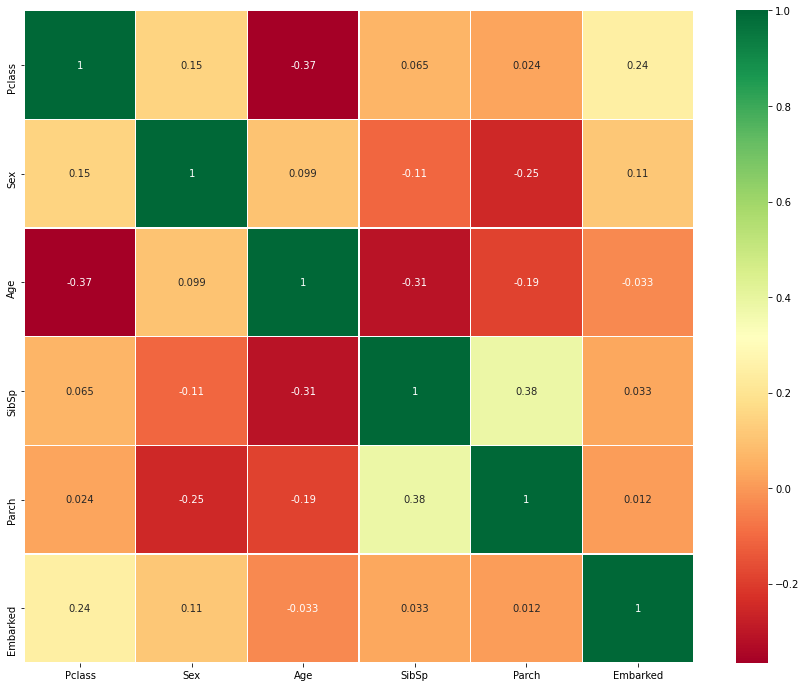

In [115]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

In [116]:
lr=LogisticRegression()
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf1 = GridSearchCV(lr,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=5)                     
clf1.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [117]:
y_pred=clf1.predict(X_test)

In [118]:
clf1.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [119]:
clf1.score(X_test,y_test)

0.8194444444444444

In [120]:
cm=confusion_matrix(y_test,y_pred)

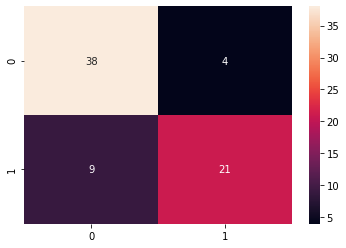

In [121]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [122]:
dt=DecisionTreeClassifier()
tree_para = [{'criterion':['gini','entropy'],'max_depth':list(range(1,20))}]
clf = GridSearchCV(dt, tree_para, cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}])

In [123]:
print(clf.best_params_)
yt_pred=clf.predict(X_test)

{'criterion': 'entropy', 'max_depth': 6}


In [124]:
clf.score(X_test,y_test)

0.7777777777777778

In [125]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7890625 0.7578125 0.84375   0.84375   0.796875 ]
0.80625


In [126]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7421875 0.734375  0.7265625 0.734375  0.7578125]
0.7390625


In [127]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6171875 0.6640625 0.609375  0.625     0.6171875]
0.6265625


In [128]:
kn=KNeighborsClassifier()
n_neighbors=list(range(1,31))
weights=['uniform','distance']
metric=['euclidean','manhattan','minikowski']
param_grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

clf2 = GridSearchCV(kn,param_grid, cv=5)
clf2.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minikowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [129]:
yk_pred=clf2.predict(X_test)

In [130]:
clf2.score(X_test,y_test)

0.7222222222222222

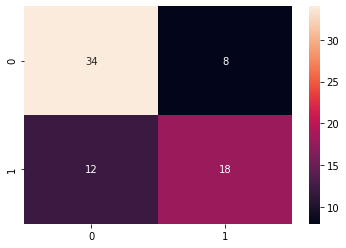

In [131]:
cm=confusion_matrix(y_test,yk_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [134]:
final_clf.score(X_train, y_train)

0.846875

In [137]:
# Thanks